In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

all_files = glob.glob(os.path.join('../data/generated/' , "generated_*.csv"))
print(all_files)

dataset = pd.DataFrame()
for idx, filename in enumerate(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    df['Person'] = idx + 1
    dataset = pd.concat([dataset, df])

print(dataset.info())

filtered = dataset.loc[dataset['Credit/Debit'] == 'debit']
filtered['Transaction Category'] = filtered['Transaction Category'].str.lower()
filtered.drop(['Credit/Debit'], axis=1, inplace=True)

months = filtered['Year-Month'].unique()
# print(months)

featured_dataset = filtered

print(featured_dataset)


['../data/generated/generated_data_2.csv', '../data/generated/generated_data_3.csv', '../data/generated/generated_data_1.csv']
<class 'pandas.core.frame.DataFrame'>
Index: 28037 entries, 0 to 9365
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              28037 non-null  object 
 1   Transaction Category              28037 non-null  object 
 2   Amount                            28037 non-null  float64
 3   Credit/Debit                      28037 non-null  object 
 4   Payment Method                    28037 non-null  object 
 5   Inflation Rate                    28037 non-null  float64
 6   Dependent Family Size             28037 non-null  int64  
 7   Age                               28037 non-null  int64  
 8   Months with Higher Spending       28037 non-null  object 
 9   Number of Expenses a Month        28037 non-null  int64  
 10  Most Freq

In [34]:
df = featured_dataset

# General statistics for numerical columns
stat_summary = df.describe(include=[np.number])

# Skewness and Kurtosis
stat_summary.loc['skew'] = df.skew(numeric_only=True)
stat_summary.loc['kurt'] = df.kurt(numeric_only=True)

# Display the statistical summary
print("Statistical Summary:")
print(stat_summary)

# For categorical columns
cat_summary = df.describe(include=['O'])
print("\nCategorical Columns Summary:")
print(cat_summary)


Statistical Summary:
             Amount  Inflation Rate  Dependent Family Size           Age  \
count  28037.000000    2.803700e+04           28037.000000  28037.000000   
mean    1660.609195    1.400000e+00               1.435496     26.442023   
std      796.971247    7.405320e-13               1.297525      3.327421   
min      350.000000    1.400000e+00               0.000000     23.000000   
25%     1090.000000    1.400000e+00               0.000000     23.000000   
50%     1470.000000    1.400000e+00               1.000000     25.000000   
75%     2050.000000    1.400000e+00               3.000000     31.000000   
max     7580.000000    1.400000e+00               3.000000     31.000000   
skew       1.325103    0.000000e+00               0.211551      0.516158   
kurt       2.337947    0.000000e+00              -1.682661     -1.488227   

       Number of Expenses a Month  Estimated Monthly Expenses           Day  \
count                28037.000000                28037.000000  

In [25]:
print("Correlation matrix:")
corr_matrix = df[['Year', 'Month', 'Day', "Amount",'Last Month Budget', 'Average Monthly Budget', 'Cumulative Monthly Spending',
                  'Dependent Family Size', 'Inflation Rate', 'Age', 'Number of Expenses a Month', 'Estimated Monthly Expenses', 'Budget']].corr()
corr_matrix

Correlation matrix:


,Year,Month,Day,Amount,Last Month Budget,Average Monthly Budget,Cumulative Monthly Spending,Dependent Family Size,Inflation Rate,Age,Number of Expenses a Month,Estimated Monthly Expenses,Budget
Year,1.000000,-0.007109,0.000723,-0.012231,-0.013685,0.000468,-0.007375,0.002051,NaN,-0.003442,0.007268,0.000637,-0.009961
Month,-0.007109,1.000000,-0.005611,-0.016839,-0.242170,-0.004417,-0.055916,-0.001124,NaN,-0.004969,-0.138578,-0.004127,-0.078223
Day,0.000723,-0.005611,1.000000,-0.235595,0.012460,0.019136,0.710442,0.007777,NaN,0.015557,0.053683,0.018181,0.035581
Amount,-0.012231,-0.016839,-0.235595,1.000000,0.529750,0.629355,0.222009,0.569979,NaN,-0.133901,0.380775,0.630459,0.674430
Last Month Budget,-0.013685,-0.242170,0.012460,0.529750,1.000000,0.873712,0.495199,0.766813,NaN,-0.135620,0.599968,0.872713,0.763322
Average Monthly Budget,0.000468,-0.004417,0.019136,0.629355,0.873712,1.000000,0.560521,0.876717,NaN,-0.153307,0.630107,0.998760,0.870490
Cumulative Monthly Spending,-0.007375,-0.055916,0.710442,0.222009,0.495199,0.560521,1.000000,0.486434,NaN,-0.075693,0.504863,0.559310,0.644472
Dependent Family Size,0.002051,-0.001124,0.007777,0.569979,0.766813,0.876717,0.486434,1.000000,NaN,-0.609727,0.448543,0.899575,0.761779
Inflation Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.003442,-0.004969,0.015557,-0.133901,-0.135620,-0.153307,-0.075693,-0.609727,NaN,1.000000,0.116815,-0.202308,-0.130587


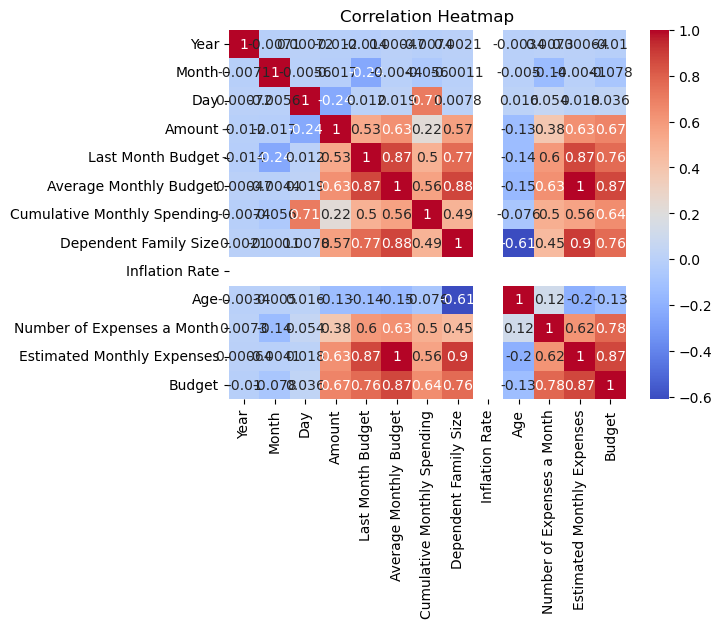

In [26]:

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


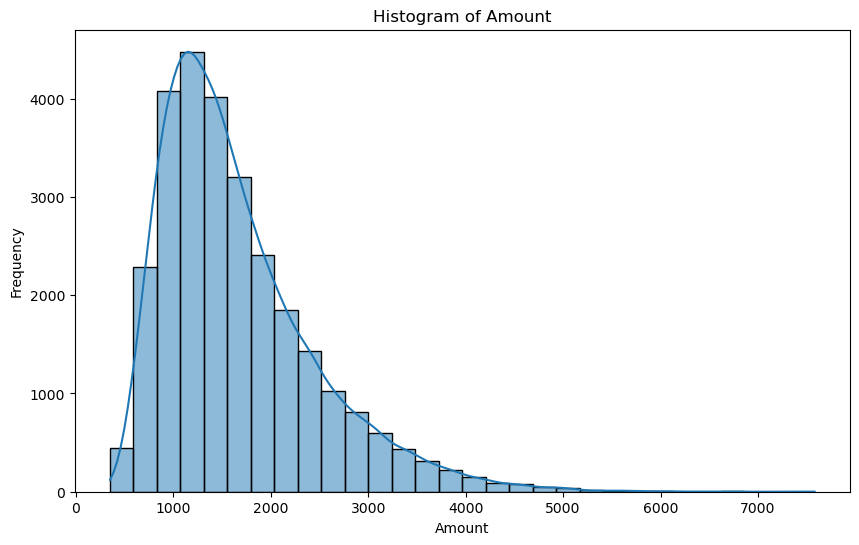

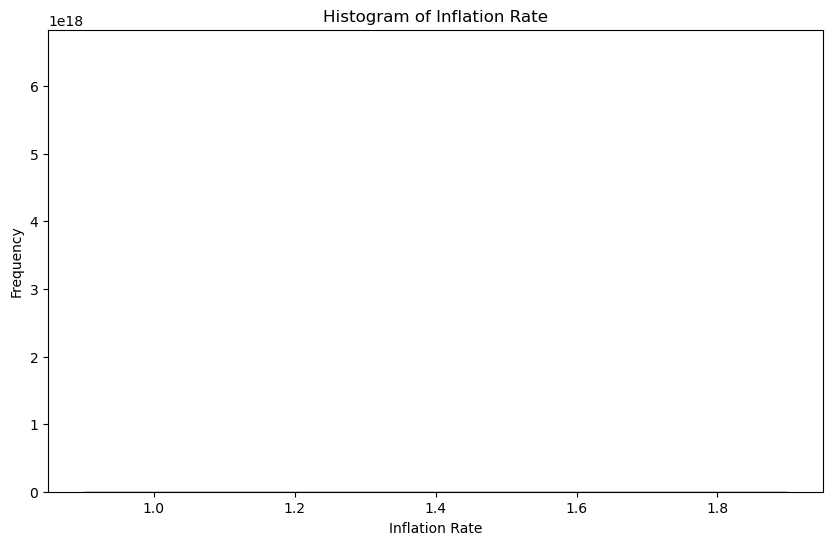

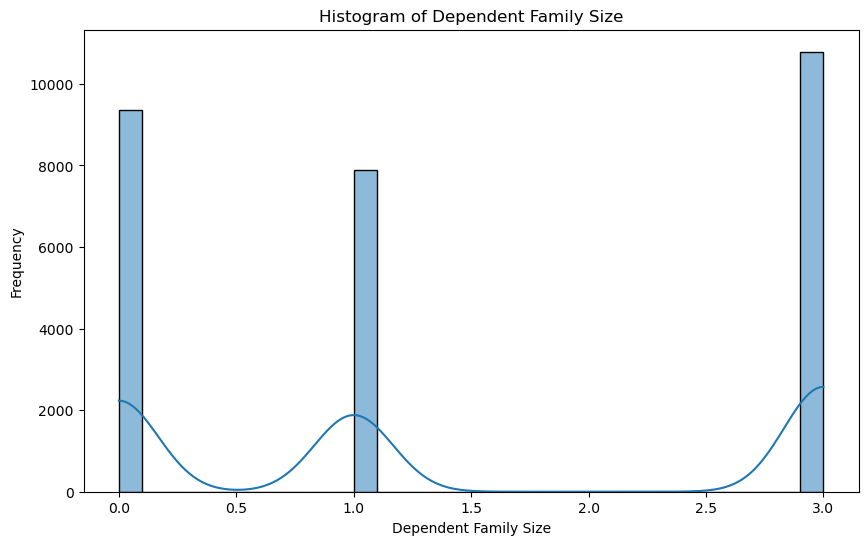

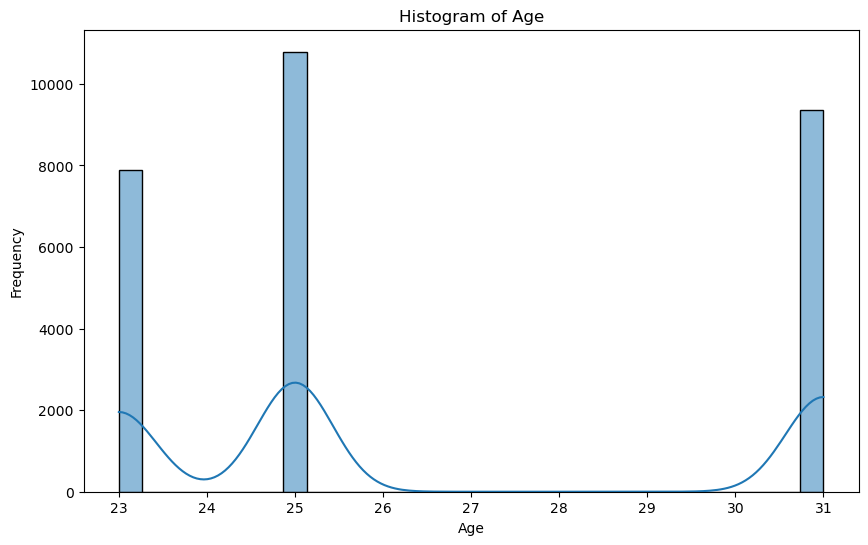

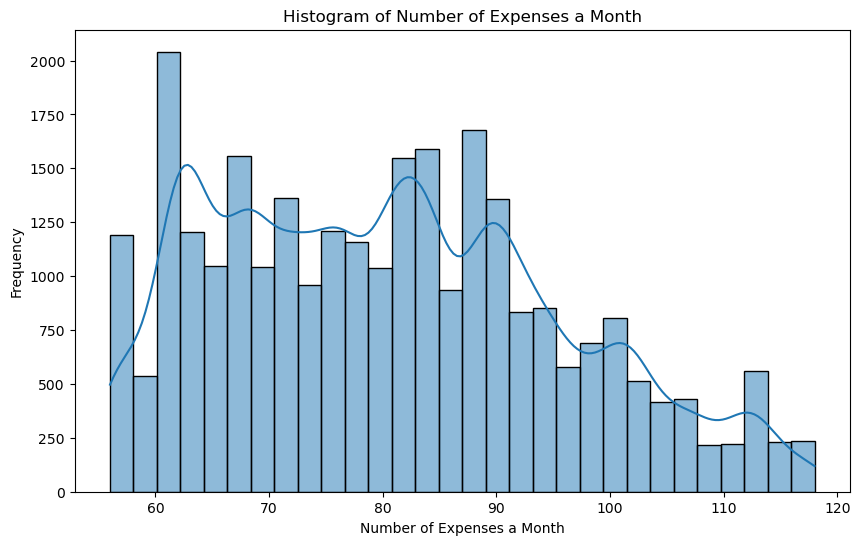

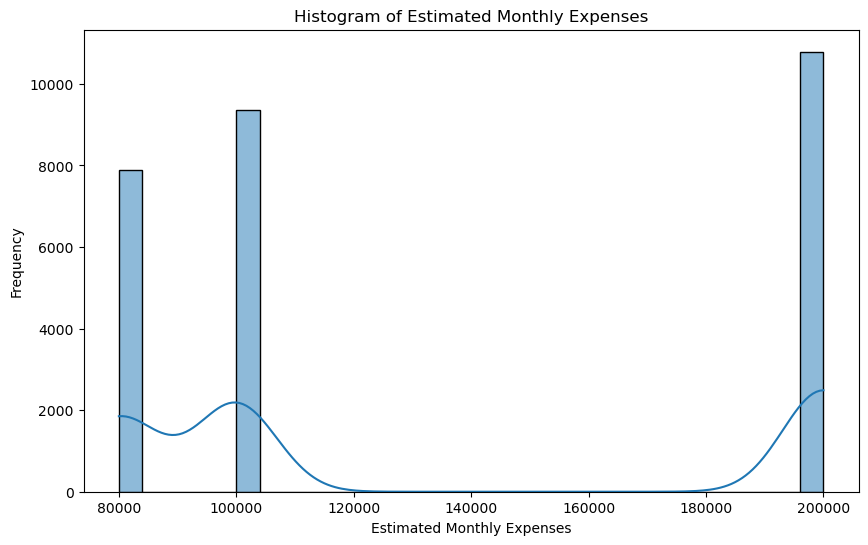

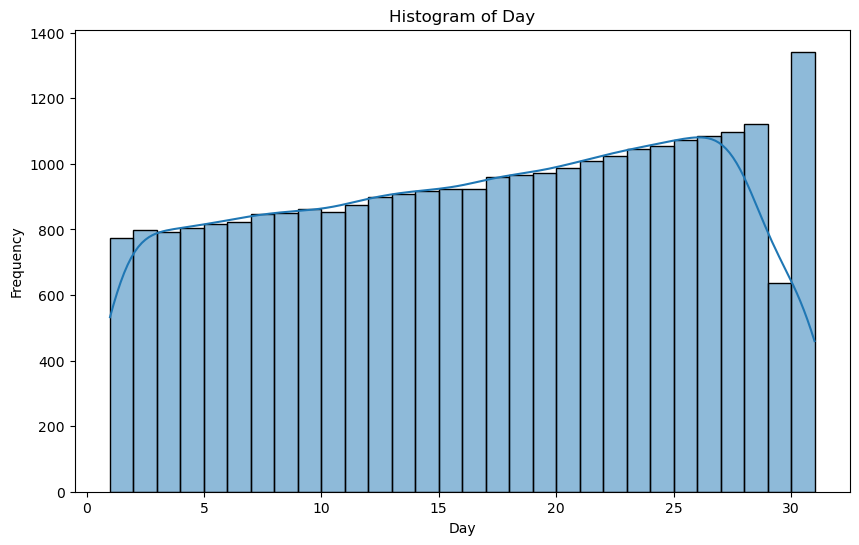

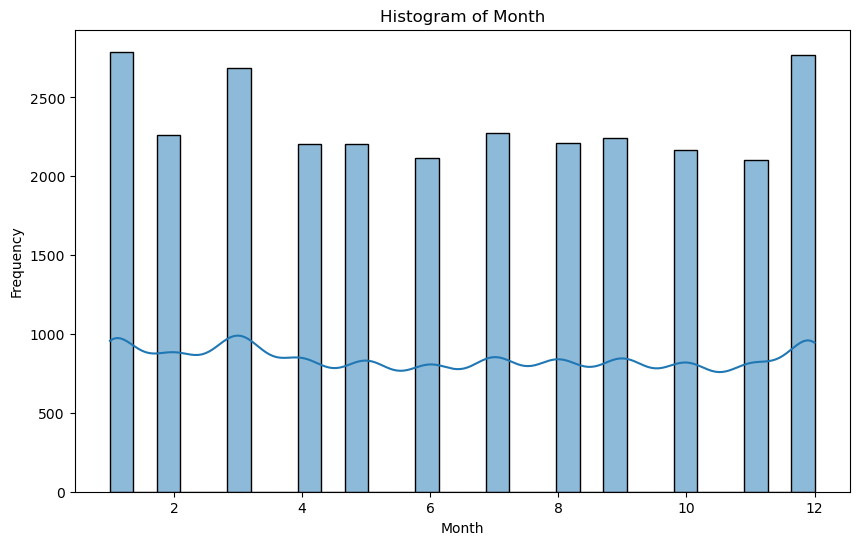

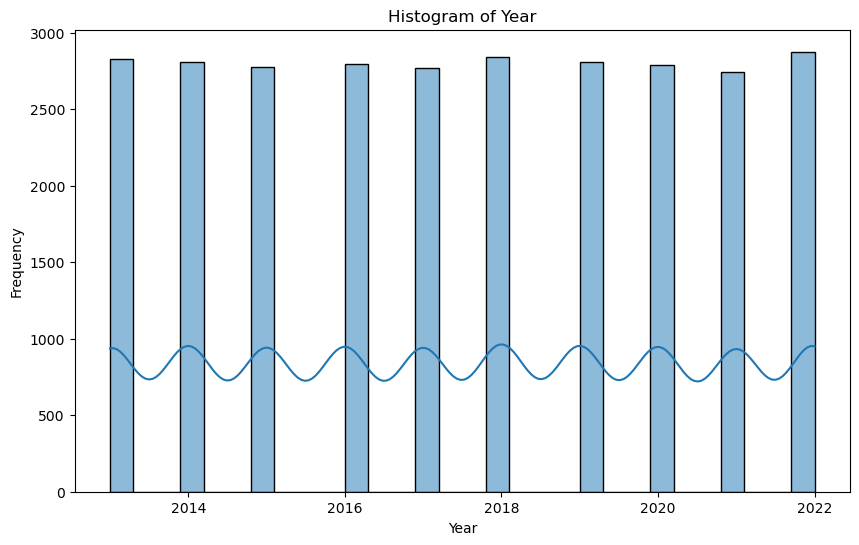

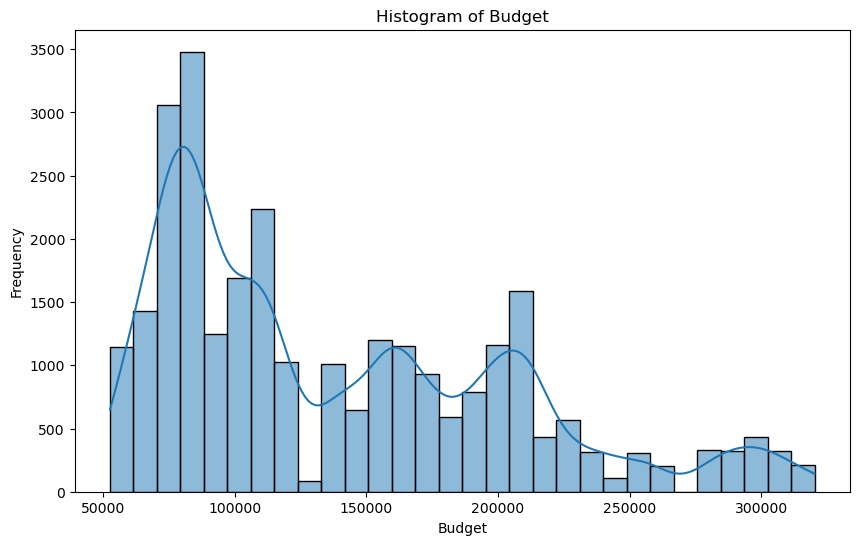

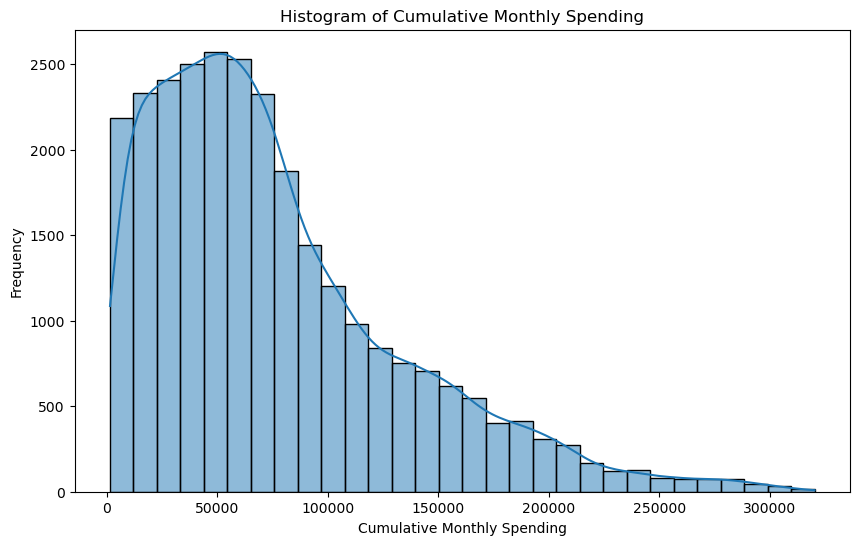

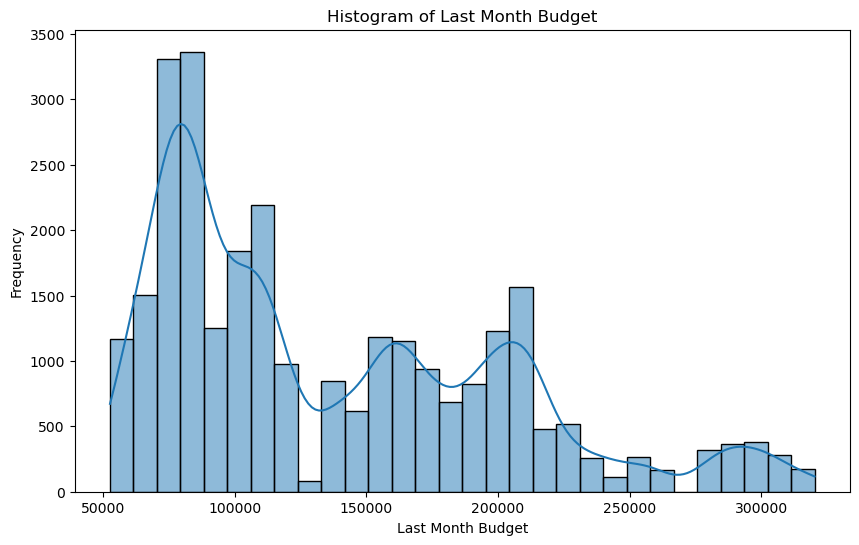

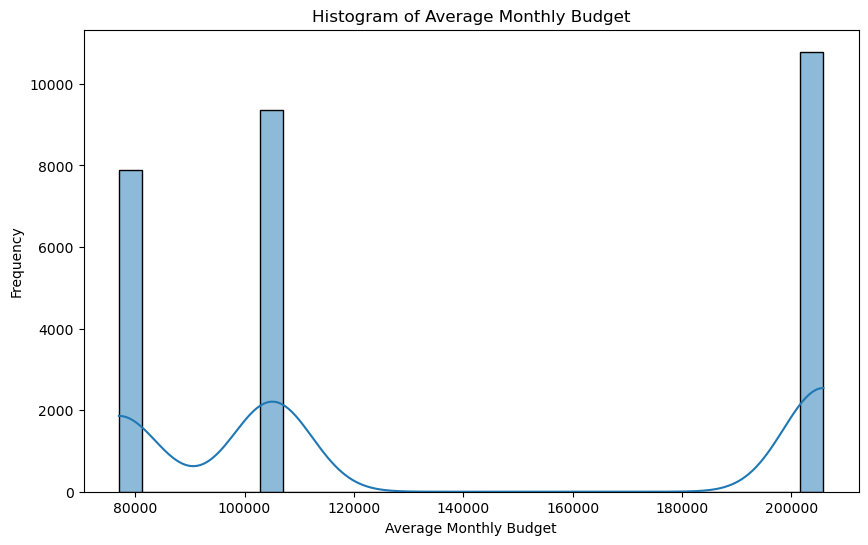

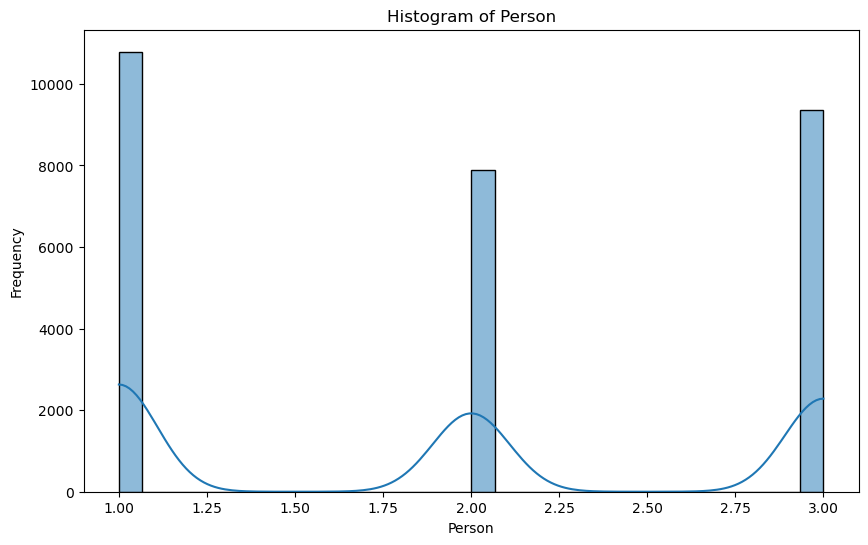

In [35]:
# 1. Histogram for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

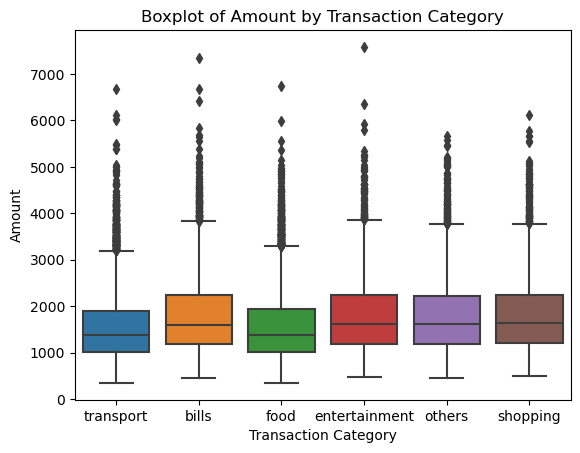

In [27]:

sns.boxplot(x='Transaction Category', y='Amount', data=df)
plt.title('Boxplot of Amount by Transaction Category')
plt.show()


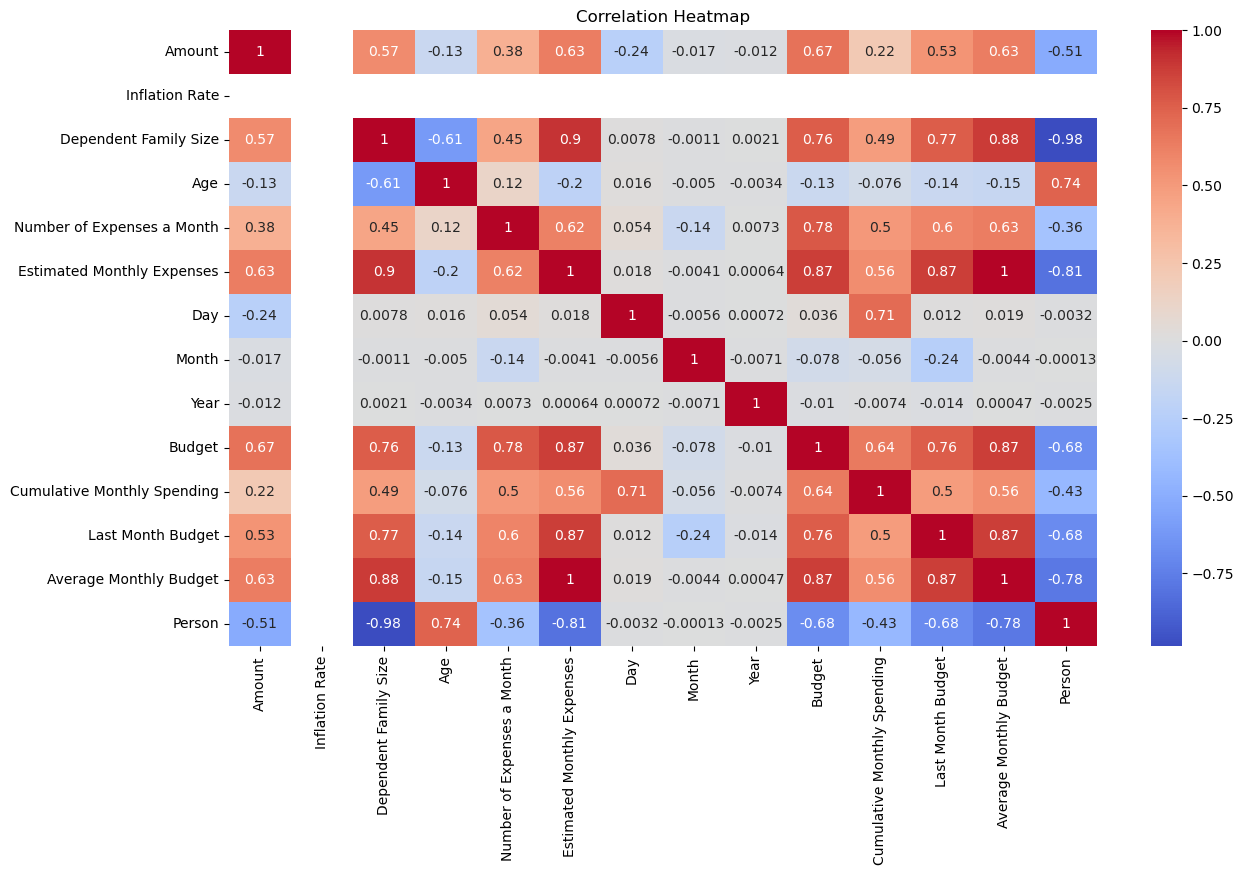

In [37]:
plt.figure(figsize=(14, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

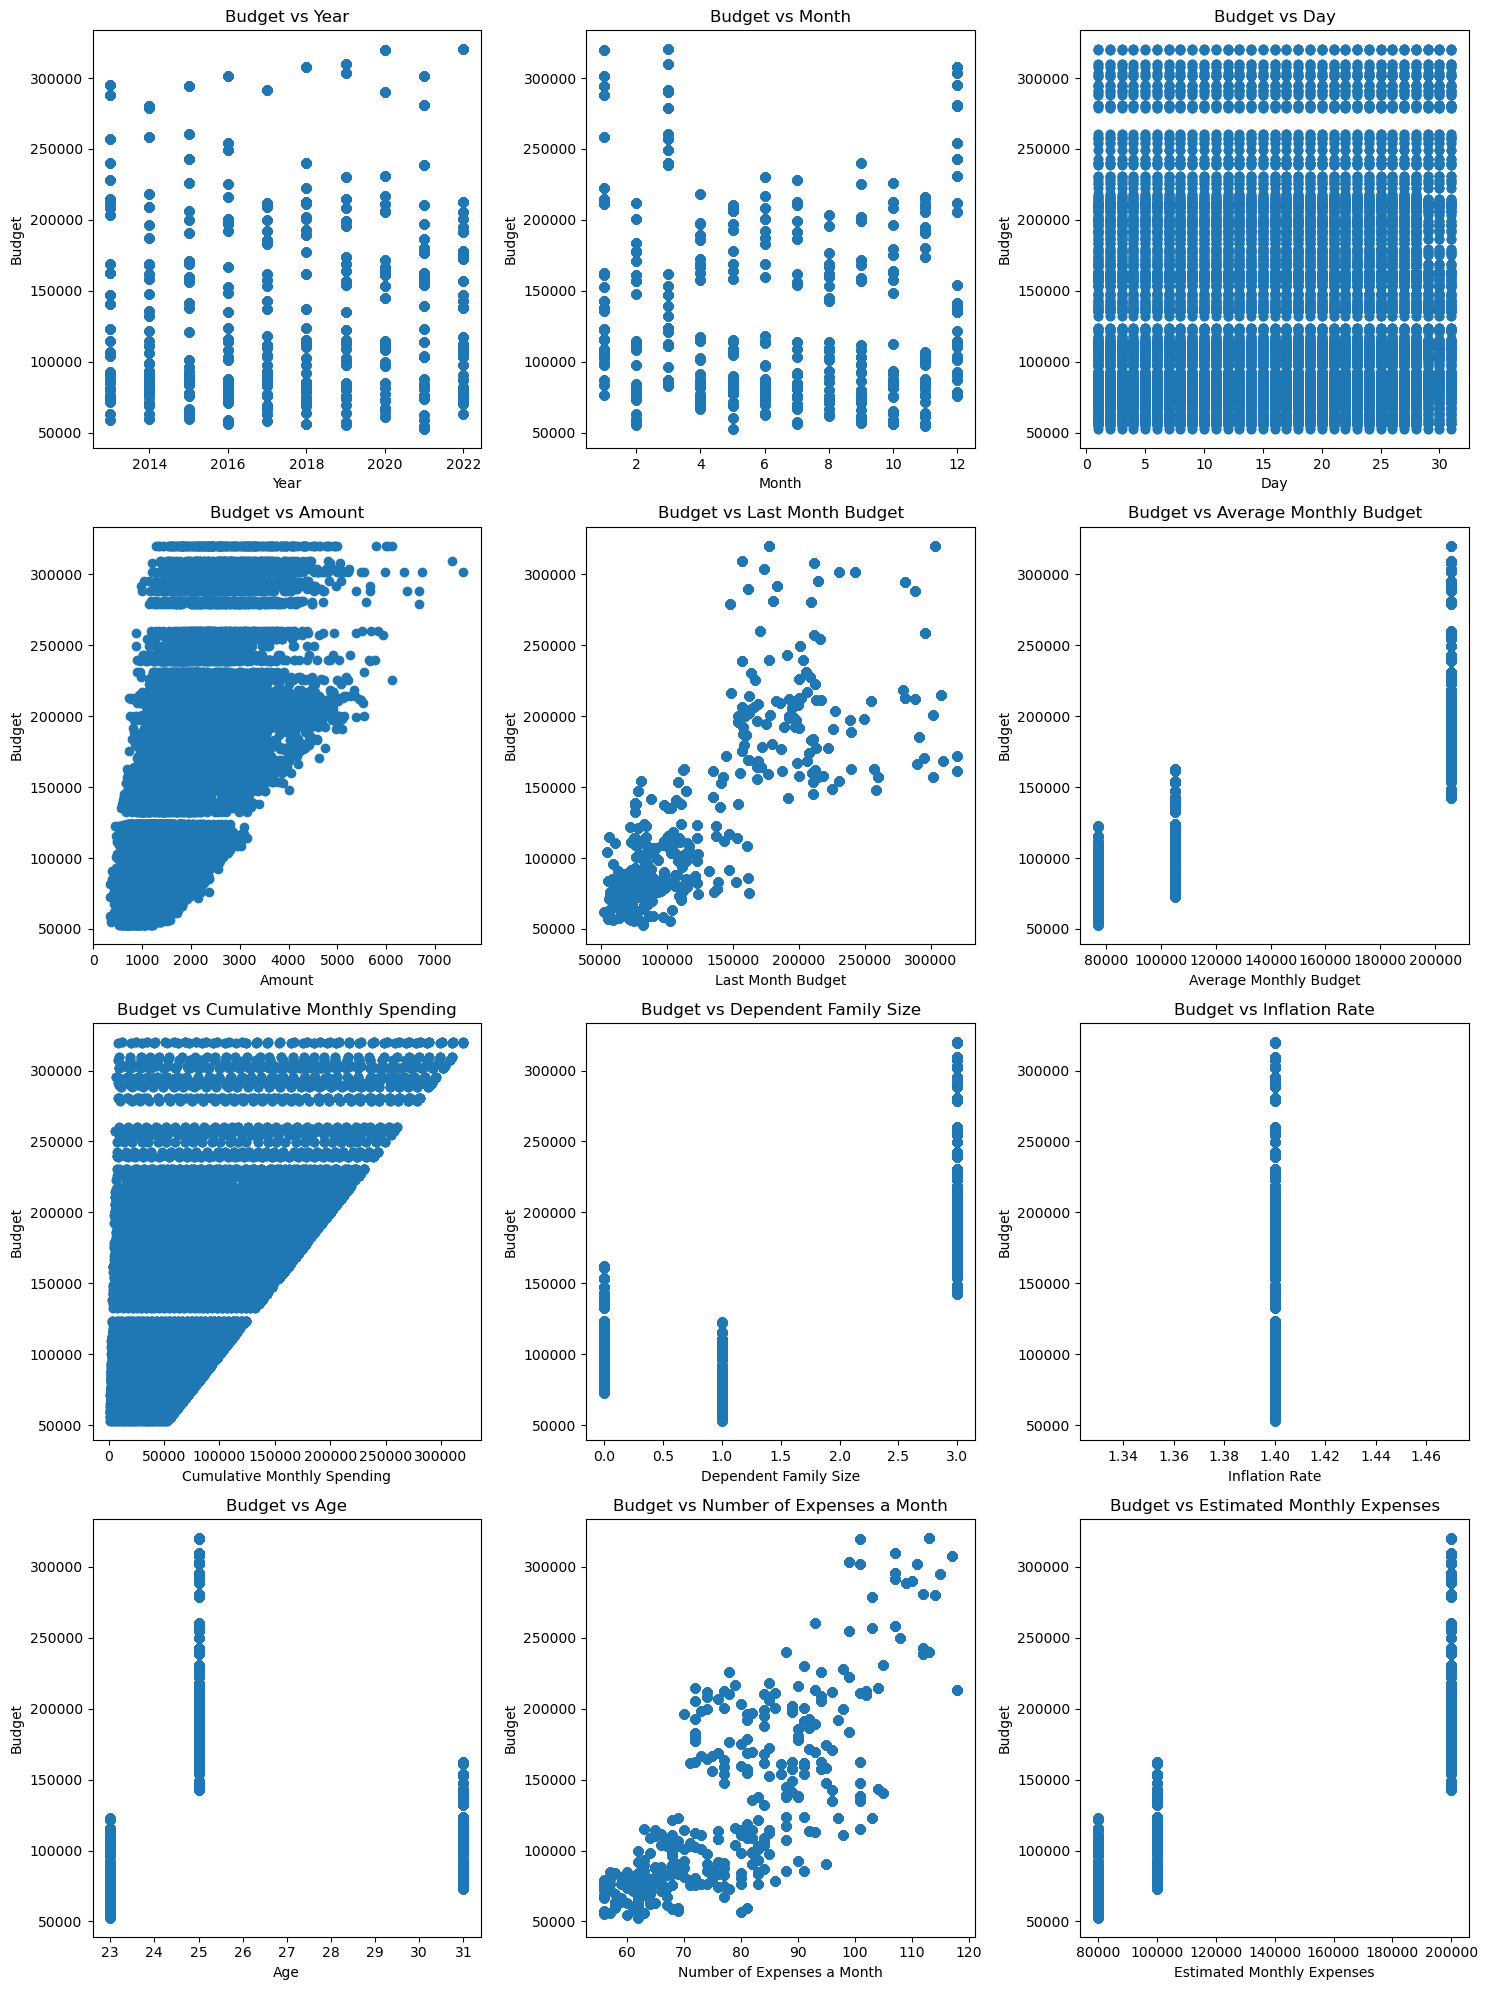

In [28]:
fields = ['Year', 'Month', 'Day', 'Amount', 'Last Month Budget', 'Average Monthly Budget', 'Cumulative Monthly Spending',
          'Dependent Family Size', 'Inflation Rate', 'Age', 'Number of Expenses a Month', 'Estimated Monthly Expenses']

fig, axs = plt.subplots(4, 3, figsize=(15, 20))
axs = axs.flatten()

for i, field in enumerate(fields):
    axs[i].scatter(df[field], df['Budget'])
    axs[i].set_title(f"Budget vs {field}")
    axs[i].set_xlabel(field)
    axs[i].set_ylabel("Budget")

for i in range(len(fields), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()